In [30]:
import numpy as np
#Esta libreria sirve para utilizar vectores y matrices de forma eficaz

def generate_cities(number_cities: int) -> list: #Funcion que genera una lista de ciudades con coordenayas x,y,z

    # HERE Generate random 3D Points using numpy generator
    cities = np.random.randint(1, 11, size=(number_cities, 3))  # Genera puntos aleatorios en el espacio con valores enteros entre 1 y 10
    return cities #Retorna una lista de ciudades con coordenadas x,y,z

"""
#Para verificar que nos imprime la lista de ciudades le doy un argumento de 4 ciudades
c= generate_cities(4) #LLamado de la funcion
print(c)

#Efectivamente nos imprime el total de ciudades
"""


'\n#Para verificar que nos imprime la lista de ciudades le doy un argumento de 4 ciudades\nc= generate_cities(4) #LLamado de la funcion\nprint(c)\n\n#Efectivamente nos imprime el total de ciudades\n'

In [31]:
def calculate_distance(point_1: np.array, point_2: np.array) -> float: #Funcion para calcular distancia entre ciudades

    # HERE return distance between two points using euclidean distance formula
    distance = np.sqrt(np.sum((point_1 - point_2) ** 2))  # Calculate Euclidean distance
    return distance #Retorna la distancia entre las dos ciudades

"""
#Para verificar que esta dando la distancia entre dos ciudades
# Generar dos puntos x,y,z aleatorios
city1 = np.array(generate_cities(1)[0])
city2 = np.array(generate_cities(1)[0])

# Calcular la distancia entre estos dos puntos (ciudades)
d = calculate_distance(city1, city2)

print(f"La distancia entre la ciudad 1 {city1} y la ciudad 2 {city2} es: {d}")

#Efectivamente nos imprime correctamente la distancia
"""

'\n#Para verificar que esta dando la distancia entre dos ciudades\n# Generar dos puntos x,y,z aleatorios\ncity1 = np.array(generate_cities(1)[0])\ncity2 = np.array(generate_cities(1)[0])\n\n# Calcular la distancia entre estos dos puntos (ciudades)\nd = calculate_distance(city1, city2)\n\nprint(f"La distancia entre la ciudad 1 {city1} y la ciudad 2 {city2} es: {d}")\n\n#Efectivamente nos imprime correctamente la distancia\n'

In [32]:
def ant_colony_optimization(
    cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q ): #Funcion para resolver TSP usando ACO

    # Parameters:
    # - cities (list): List of cities.
    # - n_ants (int): Number of ants.
    # - n_iterations (int): Number of iterations.
    # - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    # - beta (float):  It determines how much the ants are influenced by the distance to the next city
    # - evaporation_rate (float): Evaporation rate.
    # - Q (float): It determines the intensity of the pheromone trail left behind by an ant.

    # HERE Get number of points
    number_cities =  len(cities) #Obtener el tamaño de la lista de ciudades para saber cuantas ciudades son
    # HERE Initialize pheromone matrix with ones
    pheromone = np.ones((number_cities, number_cities))
    #Se usa la funcion np.ones de la libreria de Numpy para crear una matriz que contenga solo 1 y sea del tamaño M x M (M es la cantidad de ciudades)


    #Inicializar las metricas de salida
    best_path = None
    best_path_length = np.inf #Se utiliza un valor inicial infinito para ir agregando las rutas. Se necesita un valor que inicialmente sea mayor que cualquier distancia que pueda calcularse

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # Se almacena las rutas que hace cada hormiga en una lista
        path_lengths = [] #Listado del tamaño de las rutas recorridas

        for ant in range(n_ants): #El rango es el total de hormigas
            visited = [False] * number_cities # Para cada hormiga, inicializa una lista de ciudades con valores False, indicando que ninguna ciudad ha sido visitada todavía
            #visted es un boolean array

            # Empezar la ruta desde un punto aleatorio
            current_city = np.random.randint(number_cities) #Saca una ciudad aleatoria como punto de partida
            visited[current_city] = True # La ciudad por la que empieza la ruta ya esta visitada
            path = [current_city]
            path_length = 0 #La hormiga esta en el origen, por lo que no hay una distancia recorrida
            while False in visited:  # Mientras falten ciudades por visitar, halla una lista con valores false
                unvisited = np.where(np.logical_not(visited))[0] #Obtiene el primer elemento de la matriz booleana de ciudades no visitadas
                probabilities = np.zeros(len(unvisited)) #Se crea una matriz de ceros del tamaño de ciudades no visitadas, para despues calcular las probabilidades de ser visitadas

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city

                # HERE add equation to calculate the probability of moving to a city based on pheromone, distance and alpha and beta parameters
                for i, unvisited_city in enumerate(unvisited): #Se tiene que iterar la lista de ciudades no visitadas
                    probabilities[i] = pheromone[current_city, unvisited_city] * alpha + calculate_distance(cities[current_city], cities[unvisited_city]) * beta

                # normalize probabilities, it means, the sum of all probabilities is 1
                # HERE add normalization for calculated probabilities
                probabilities = probabilities /np.sum(probabilities)

                #Se tiene que normalizar las probabilidades para opmilizar el algoritmo y no hacer los datos tan pesados al ser implementados

                next_city = np.random.choice(unvisited, p=probabilities) #Se escoge siguiente ciudad teniendo en cuenta los parametros de que no sea una ciudad visitada y que la probabilidad sea mayor
                path.append(next_city) #El .append nos sirve para añadir al final de la lista el parametro que es siguiente ciudad
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                ) #Cuando se calcula la distancia se suma a la ruta y el tamaño de la ruta toma este valor
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city #Cuando la siguiente ciudad ya sea visitada este toma el valor de ciudad actual
                paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length
    return best_path, best_path_length

In [42]:
# # model parameters
# cities = cities
# n_ants = 100
# n_iterations = 100
# alpha = 1
# beta = 1
# evaporation_rate = 0.5
# Q = 1

# HERE create list of cities
cities = generate_cities(10) #LLamado de la funcion

# HERE call ant_colony_optimization function
aco = ant_colony_optimization(cities,  100 , 100 , 1, 1, 0.5, 1 )

best_path = aco[0] # se toma el primer el elemento de la lista de best_path, que representa al mejor camino a recorrer
best_path_length = aco[1]


Best path: [1, 6, 7, 0, 8, 4, 3, 5, 2, 9]
Best path length: 38.58522752312703


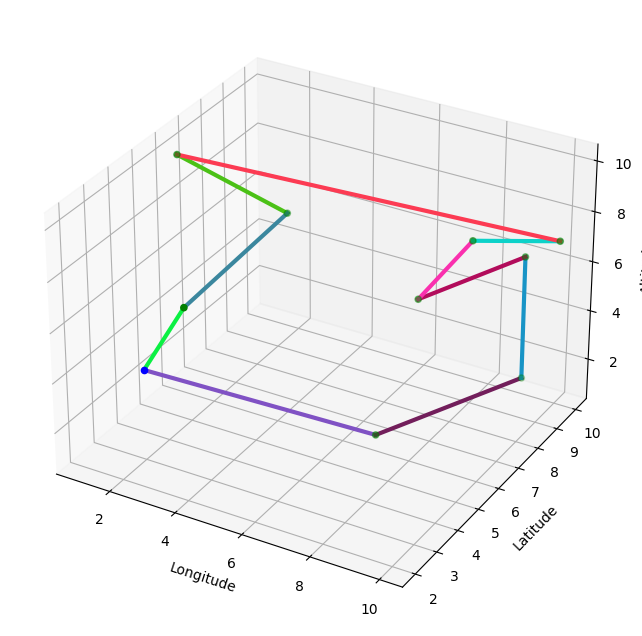

In [43]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def random_color() -> list:
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (np.array): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )
    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()


print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)